**PREDIKSI PERKEMBANGAN DAILY CASE COVID TANGGAL 15 NOVEMBER 2021 - 14 DESEMBER 2021** <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('covid_indonesia_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal          137 non-null    object
 1   Kasus_harian     137 non-null    int64 
 2   Total_kasus      137 non-null    int64 
 3   Kasus_aktif      137 non-null    int64 
 4   Sembuh_baru      137 non-null    int64 
 5   Sembuh           137 non-null    int64 
 6   Meninggal_baru   137 non-null    int64 
 7   Meninggal_Dunia  137 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [3]:
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


Interpretasi Statistik Deskriptif :
- Dapat dilihat bahwa tidak ada data null, semua kolom berjumlah 137 
- Features yang ingin diprediksi yaitu Kasus_harian terlihat tidak terdistribusi normal, melainkan mengalami right skewness oleh sebab itu nanti kolom Kasus_harian ini akan diubah menjadi distribusi normal dengan menggunakan transformasi log

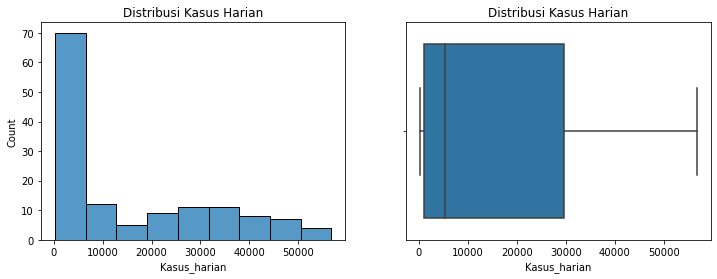

In [4]:
fig,axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax = axs[0],x=df['Kasus_harian'])
axs[0].set_title('Distribusi Kasus Harian')
sns.boxplot(ax = axs[1],x=df['Kasus_harian'])
axs[1].set_title('Distribusi Kasus Harian')
plt.show()

Dapat dilihat juga dari kedua visualisasi diatas bahwa kolom Kasus_harian memiliki distribusi right skewness. Namun pada kolom tersebut tidak terdapat outlier.

In [5]:
# Untuk membuat suatu model prediksi kasus harian maka kolom yg dibutuhkan hanyalah kolom Tanggal & Kasus_harian
df_use = df[['Tanggal','Kasus_harian']]
df_use

,Tanggal,Kasus_harian
0,2021-07-01,24836
1,2021-07-02,25830
2,2021-07-03,27913
3,2021-07-04,27233
4,2021-07-05,29745
...,...,...
132,2021-11-10,480
133,2021-11-11,435
134,2021-11-12,399
135,2021-11-13,359


In [6]:
# lakukan transformasi terhadap kolom Kasus_harian dengan menggunakan np.log
df_use['Cases_norm'] = np.log(df_use['Kasus_harian'])

In [7]:
'''Dapat kita lihat bahwa kolom Tanggal memiliki format string, sedangkan dalam menggunakan alogirtma regresi kita harus
memiliki features berupa angka. Oleh sebab itu dikarenakan data tanggal berurutan (setiap hari selalu ada kasus baru), maka
untuk memudahkan kita buat tanggal pertama dari dataset yang kita miliki yaitu (1 Juli 2021) sebagai angka 0.'''

df_use['days'] = df_use['Tanggal'].index

In [8]:
# Buat data frame baru yang berisikan kolom Cases_norm & days --> data frame ini yang digunakan untuk pemodelan
df_fix = df_use[['Cases_norm','days']]
df_fix.head()

,Cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4


In [9]:
# Definisikan feature dan target ke dalam suatu variabel
X = np.array(df_fix[['days']]).reshape(-1,1)
y = np.array(df_fix['Cases_norm'])

In [10]:
# Bagi menjadi data train dan data test dengan menggunakan train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
print(X_train.size, X_test.size)

109 28


In [11]:
# Dikarenakan kasus harian covid tidaklah selalu naik/turun secara linear maka kita harus membuatnya dalam bentuk polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,y_train)


LinearRegression()

In [12]:
poly_X_test = poly_reg.fit_transform(X_test)
y_pred = model.predict(poly_X_test)

# Mengecek score dari pemodelan machine learning yang telah dibuat dengan r2 score
from sklearn import metrics
r2 = metrics.r2_score(y_pred,y_test)
print(r2)

0.9555227204804164


In [13]:
# 15 NOVEMBER 2021 =  hari ke 137 setelah 1 Juli
# 14 DESEMBER 2021 = hari ke 166 setelah 1 Juli 

# Melakukan prediksi kasus covid 15Nov - 14Des:
predict_date = np.arange(137,167).reshape(-1,1)
poly_predict_date = poly_reg.fit_transform(predict_date)
y_predict_date = model.predict(poly_predict_date)

In [14]:
'''Dikarenakan saat awal dilakukan normalisasi terhadap Kasus harian maka hasil prediksi juga masih dalam bentuk hasil log.
Oleh sebab itu dilakukan anti normalisasi dengan cara np.exp untuk target yang telah dihasilkan'''

y_inverse = np.exp(y_predict_date)
y_inverse = np.ceil(y_inverse)
y_inverse = y_inverse.astype(int)

In [15]:
df_prediksi = pd.DataFrame({'Hari ke -':np.arange(137,167),
                            'Jumlah kasus harian' : y_inverse})
df_prediksi.head()

,Hari ke -,Jumlah kasus harian
0,137,206
1,138,194
2,139,183
3,140,173
4,141,163


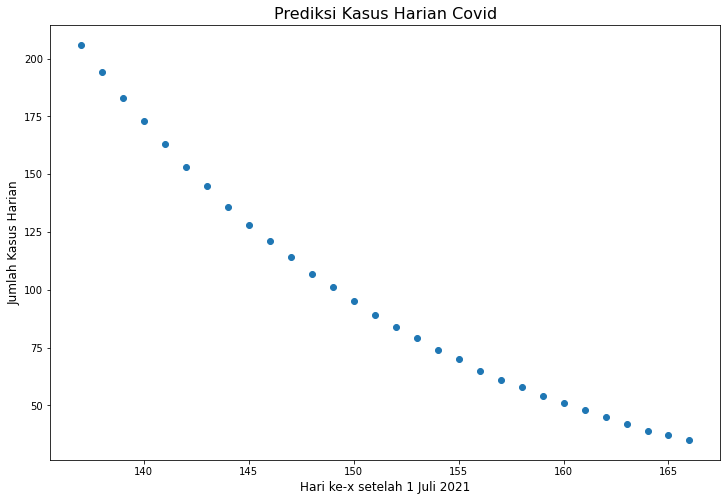

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(predict_date,y_inverse)
plt.title('Prediksi Kasus Harian Covid',fontsize = 16)
plt.xlabel('Hari ke-x setelah 1 Juli 2021',fontsize=12)
plt.ylabel('Jumlah Kasus Harian',fontsize=12)
plt.show()

Meskipun terlihat prediksi kasus harian covid 19 di Indonesia memiliki tren yang semakin hari semakin menurun, namun kita tetap harus waspada dan selalu menaati protokol kesehatan.